In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [ ]:
import pandas as pd

original = pd.read_csv("intent_dataset.csv")
augmented = pd.read_csv("random_augmented_balanced_dataset.csv")

print(original.head())
print(augmented.head())


                                                text              intent
0  My child has had a hemangioma on his face for ...           treatment
1           Whereof are the symptoms of neurilemoma?            symptoms
2  Can paroxetine hydrochloride tablets be used t...  applicable disease
3  Want to cure bradycardia. Is Xinbao Pill an ef...               usage
4  I want to ask if Xiaoyao Pill is effective for...  applicable disease
                                                text              intent
0  how-do-you-do, can Qianggu Capsule be used to ...  applicable disease
1  Breelyn, ask the doctor to fulfilling minimall...              method
2  My girlfriend's situation is very similar to c...            ask more
3  represent the poorly differentiated stage of c...          definition
4              Can anemia cause high blood pressure?               cause
                                                text              intent  \
0  how-do-you-do, can Qianggu Capsule be used to

In [ ]:
print(original['intent'].value_counts())
print(augmented['intent'].value_counts())


intent
treatment                 1121
symptoms                  1116
disease manifestations    1048
cause                      936
definition                 848
usage                      848
method                     820
applicable disease         783
treatment method           774
ask more                   758
Name: count, dtype: int64
intent
applicable disease        1709
usage                     1587
definition                1575
treatment method          1569
method                    1555
ask more                  1523
treatment                 1505
disease manifestations    1372
cause                     1366
symptoms                  1313
Name: count, dtype: int64
intent
applicable disease        926
treatment method          793
ask more                  765
usage                     739
method                    732
definition                692
cause                     427
treatment                 382
disease manifestations    324
symptoms                  195
Name: c

### Compare Text Lengths

In [9]:
original['length'] = original['text'].apply(lambda x: len(x.split()))
augmented['length'] = augmented['text'].apply(lambda x: len(x.split()))

original['length'].describe()
augmented['length'].describe()


count    15074.000000
mean        22.216465
std         20.469541
min          1.000000
25%          9.000000
50%         16.000000
75%         28.000000
max        401.000000
Name: length, dtype: float64

### Vocabulary Analysis

In [10]:
from collections import Counter

def get_vocab(df):
    all_words = " ".join(df['text']).split()
    return set(all_words), Counter(all_words)

vocab_orig, freq_orig = get_vocab(original)
vocab_aug, freq_aug = get_vocab(augmented)

overlap = vocab_orig.intersection(vocab_aug)
print(f"Original vocab size: {len(vocab_orig)}")
print(f"Augmented vocab size: {len(vocab_aug)}")
print(f"Overlap: {len(overlap)} ({len(overlap)/len(vocab_orig):.2%})")


Original vocab size: 15498
Augmented vocab size: 20338
Overlap: 15497 (99.99%)


### Lexical Diversity

In [ ]:
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if len(words) > 0 else 0

original['lex_div'] = original['text'].apply(lexical_diversity)
augmented['lex_div'] = augmented['text'].apply(lexical_diversity)

print(original['lex_div'].describe())
print(augmented['lex_div'].describe())


count    9052.000000
mean        0.926411
std         0.091967
min         0.210526
25%         0.871795
50%         0.956522
75%         1.000000
max         1.000000
Name: lex_div, dtype: float64
count    15074.000000
mean         0.927446
std          0.090061
min          0.210526
25%          0.875000
50%          0.956522
75%          1.000000
max          1.000000
Name: lex_div, dtype: float64
count    5975.000000
mean        0.928443
std         0.087214
min         0.416667
25%         0.875000
50%         0.954545
75%         1.000000
max         1.000000
Name: lex_div, dtype: float64


### Semantic Similarity

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings_orig = model.encode(original['text'].tolist())
embeddings_aug = model.encode(augmented['text'].tolist())

# Compute average similarity between original and augmented set
sim = cosine_similarity(embeddings_orig.mean(axis=0).reshape(1, -1),
                        embeddings_aug.mean(axis=0).reshape(1, -1))[0][0]

print(f"Semantic similarity between dataset centroids: {sim:.4f}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\S.SHIKHAR\Desktop\Intent Classification with dataset\myenv\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\S.SHIKHAR\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Semantic similarity between dataset centroids: 0.9965


### Visualizations

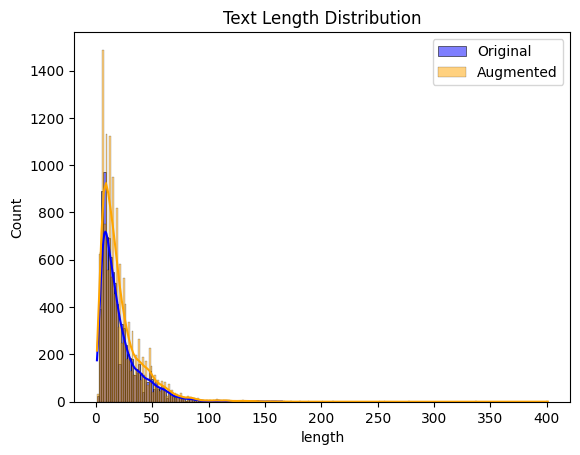

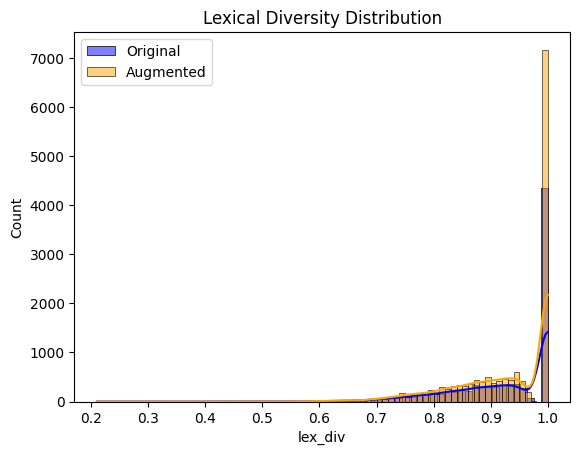

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(original['length'], label='Original', color='blue', kde=True)
sns.histplot(augmented['length'], label='Augmented', color='orange', kde=True)
plt.legend(); plt.title("Text Length Distribution"); plt.show()

sns.histplot(original['lex_div'], label='Original', color='blue', kde=True)
sns.histplot(augmented['lex_div'], label='Augmented', color='orange', kde=True)
plt.legend(); plt.title("Lexical Diversity Distribution"); plt.show()


### Cosine Similarity Histogram within Augmented Dataset

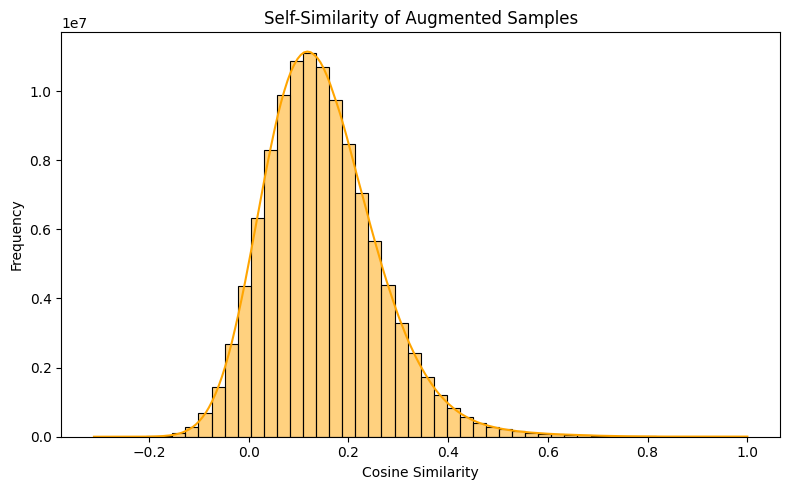

In [14]:
sims = cosine_similarity(embeddings_aug)
np.fill_diagonal(sims, 0)
sims_flat = sims[np.triu_indices_from(sims, k=1)]

plt.figure(figsize=(8, 5))
sns.histplot(sims_flat, bins=50, kde=True, color='orange')
plt.title("Self-Similarity of Augmented Samples")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Per-Intent Semantic Drift

In [15]:
intent_similarities = {}
for intent in original['intent'].unique():
    orig_texts = original[original['intent'] == intent]['text'].tolist()
    aug_texts = augmented[augmented['intent'] == intent]['text'].tolist()
    if orig_texts and aug_texts:
        orig_vec = model.encode(orig_texts).mean(axis=0)
        aug_vec = model.encode(aug_texts).mean(axis=0)
        sim = cosine_similarity([orig_vec], [aug_vec])[0][0]
        intent_similarities[intent] = sim

# Print intent-wise similarity
for intent, sim in intent_similarities.items():
    print(f"Intent: {intent:<25} Similarity: {sim:.4f}")

Intent: treatment                 Similarity: 0.9972
Intent: symptoms                  Similarity: 0.9976
Intent: applicable disease        Similarity: 0.9974
Intent: usage                     Similarity: 0.9979
Intent: definition                Similarity: 0.9986
Intent: cause                     Similarity: 0.9966
Intent: disease manifestations    Similarity: 0.9932
Intent: ask more                  Similarity: 0.9962
Intent: method                    Similarity: 0.9963
Intent: treatment method          Similarity: 0.9976


### N-gram Overlap and Distribution

In [18]:
vectorizer = CountVectorizer(ngram_range=(1, 3))
X_orig = vectorizer.fit_transform(original['text'])
X_aug = vectorizer.transform(augmented['text'])

sum_orig = np.array(X_orig.sum(axis=0)).flatten()
sum_aug = np.array(X_aug.sum(axis=0)).flatten()
ngrams = vectorizer.get_feature_names_out()

top_orig = sorted(zip(ngrams, sum_orig), key=lambda x: -x[1])[:20]
top_aug = sorted(zip(ngrams, sum_aug), key=lambda x: -x[1])[:20]

print("\nTop N-grams in Original:")
for ngram, freq in top_orig:
    print(f"{ngram:<30} {freq}")

print("\nTop N-grams in Augmented:")
for ngram, freq in top_aug:
    print(f"{ngram:<30} {freq}")


Top N-grams in Original:
the                            10125
is                             5278
to                             5269
and                            5188
what                           3965
it                             3877
of                             3441
for                            2487
in                             2387
can                            2066
my                             2020
how                            1712
have                           1689
with                           1519
do                             1508
should                         1382
are                            1340
has                            1150
be                             1144
there                          1133

Top N-grams in Augmented:
the                            16094
to                             9154
and                            8801
is                             8734
what                           6447
it                             6405
of       

In [19]:
# Convert to DataFrames
df_orig = pd.DataFrame(top_orig, columns=["N-gram", "Original Frequency"])
df_aug = pd.DataFrame(top_aug, columns=["N-gram", "Augmented Frequency"])

# Merge both on N-gram
df_combined = pd.merge(df_orig, df_aug, on="N-gram", how="outer").fillna(0)

# Optional: sort by total frequency
df_combined["Total"] = df_combined["Original Frequency"] + df_combined["Augmented Frequency"]
df_combined = df_combined.sort_values(by="Total", ascending=False)

# Save to CSV
df_combined.to_csv("ngram_frequencies.csv", index=False)

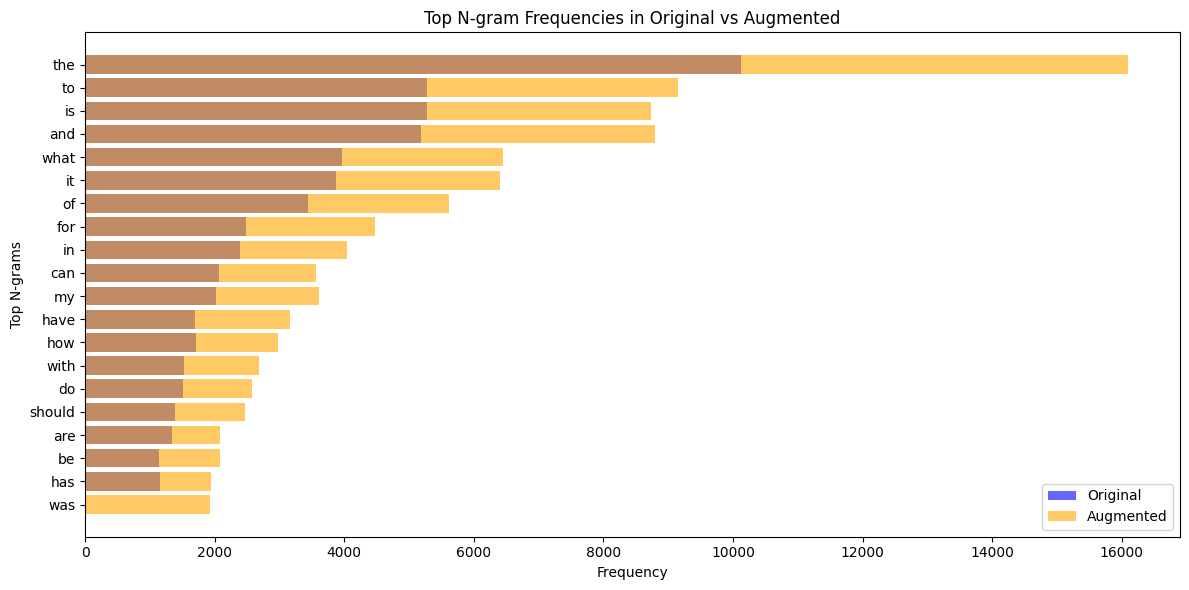

In [20]:
import matplotlib.pyplot as plt

top20 = df_combined.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top20['N-gram'], top20['Original Frequency'], color='blue', alpha=0.6, label='Original')
plt.barh(top20['N-gram'], top20['Augmented Frequency'], color='orange', alpha=0.6, label='Augmented')
plt.xlabel("Frequency")
plt.ylabel("Top N-grams")
plt.title("Top N-gram Frequencies in Original vs Augmented")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
